In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
csv = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
csv

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
csv = pd.get_dummies(csv)


In [4]:
X = csv.drop('charges',axis=1)
y=csv['charges']
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [5]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.head())
X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

len(X_train),len(y_train),len(X_test),len(y_test)

     age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
332   61  31.160         0           1         0          1           0   
355   46  27.600         0           0         1          1           0   
138   54  31.900         3           1         0          1           0   
381   55  30.685         0           0         1          0           1   
292   25  45.540         2           0         1          0           1   

     region_northeast  region_northwest  region_southeast  region_southwest  
332                 0                 1                 0                 0  
355                 0                 0                 0                 1  
138                 0                 0                 1                 0  
381                 1                 0                 0                 0  
292                 0                 0                 1                 0  


(936, 936, 402, 402)

In [16]:
# create the Deep learning regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')
])
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=['mae'])
history = model.fit(X_train,y_train,epochs=500)

Epoch 1/500
30/30 [==============================] - 1s 2ms/step - loss: 10134.9502 - mae: 10134.9502
Epoch 2/500
30/30 [==============================] - 0s 2ms/step - loss: 7357.6313 - mae: 7357.6313
Epoch 3/500
30/30 [==============================] - 0s 2ms/step - loss: 6760.4419 - mae: 6760.4419
Epoch 4/500
30/30 [==============================] - 0s 2ms/step - loss: 6505.2266 - mae: 6505.2266
Epoch 5/500
30/30 [==============================] - 0s 2ms/step - loss: 6102.2227 - mae: 6102.2227
Epoch 6/500
30/30 [==============================] - 0s 3ms/step - loss: 5410.6597 - mae: 5410.6597
Epoch 7/500
30/30 [==============================] - 0s 2ms/step - loss: 4665.8745 - mae: 4665.8745
Epoch 8/500
30/30 [==============================] - 0s 2ms/step - loss: 3725.6899 - mae: 3725.6899
Epoch 9/500
30/30 [==============================] - 0s 2ms/step - loss: 3465.2322 - mae: 3465.2322
Epoch 10/500
30/30 [==============================] - 0s 2ms/step - loss: 3579.7520 - mae: 3579.75

In [17]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 2ms/step - loss: 1356.2655 - mae: 1356.2655


[1356.2655029296875, 1356.2655029296875]

In [18]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               1200      
                                                                 
 dense_21 (Dense)            (None, 100)               10100     
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 22,421
Trainable params: 22,421
Non-trainable params: 0
_________________________________________________________________


In [19]:
y.mean() , y.median()

(13270.422265141257, 9382.033)

Text(0.5, 0, 'epochs')

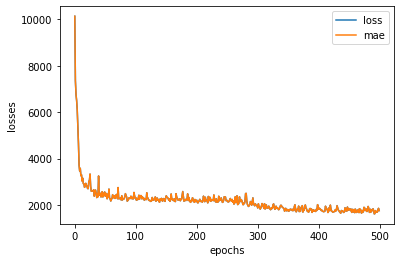

In [20]:
pd.DataFrame(history.history).plot()
plt.ylabel("losses")
plt.xlabel("epochs")
